## Data Wrangling

Data wrangling is the process of `cleaning`, `transformation`, and o`rganizing` data so that it can be used for `analysis` and `visualization`. It is an important step in the data analysis process because raw data is often `incompelete`, `inconsistent`, and in an `unstructured format`, which can make it difficult to work with. 
 Data wrangling helps to make the data more `consistent`, `accurate` and `useful` for analysis and decision making.

## Steps:
1. Gathering Data (kia) - libraries
2. Tools to clean the data (kis se clean) Libraries
3. How to do, (steps)

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# to check for missing values
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [6]:
# lets drop the deck column
# inplace means that the changes will be made to the original dataframe

df.drop(columns='deck', inplace=True)

In [7]:
# lets fill age column missing values with mean
df['age'] = df['age'].fillna(df['age'].mean())


In [10]:
# lets check again
df.isnull().sum()/len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [11]:
# now lets fill embarked column with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [10]:
# lets check again
df.isnull().sum()/len(df) * 100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [11]:
# now lets fill embark_town column with mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [12]:
# now lets check again
df.isnull().sum()/len(df) * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

## Outliers Removal

# Visualization Method


<Axes: ylabel='age'>

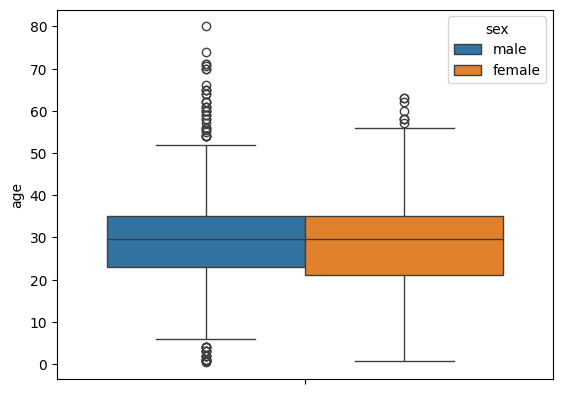

In [13]:
import seaborn as sns
sns.boxplot(data = df, y= 'age', hue='sex')

## IQR Method

In [14]:
# IQR Method to remove outliers from age column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(13.0)

In [15]:
# to remove outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]   


In [16]:
# check the df shape
filtered_df.shape

(825, 14)

In [17]:
# IQR Method to remove outliers from fare column
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR
# to remove outliers from fare column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)] 
# check the df shape again
df.shape

(775, 14)

In [18]:
# lets count how many outliers were removed
825 - 775

50

<Axes: xlabel='age', ylabel='Count'>

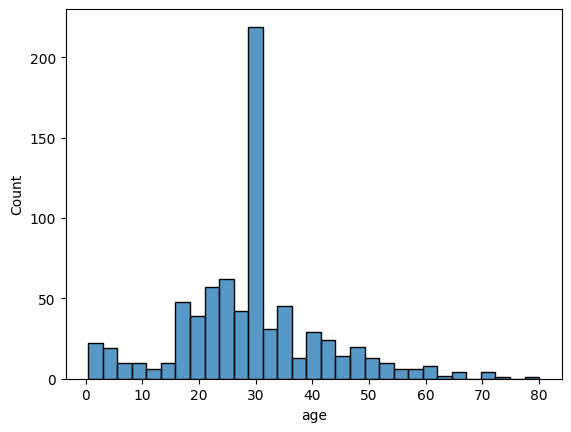

In [19]:
# lets visualize the final dataframe
sns.histplot(df['age'])

<Axes: xlabel='fare', ylabel='Count'>

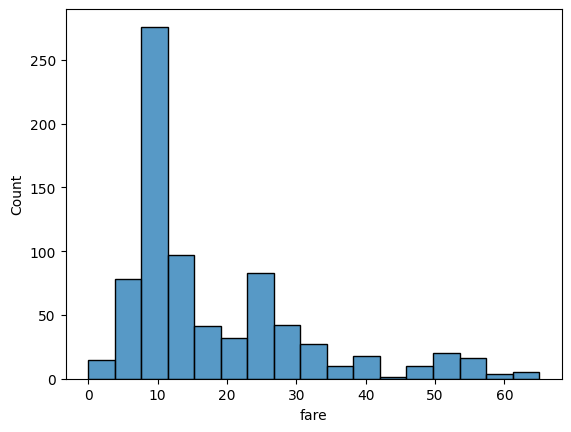

In [20]:
sns.histplot(df['fare'])

In [21]:
# Z-score method to remove outliers from age column
# from scipy import stats
# import numpy as np
# z_scores = np.abs(stats.zscore(df['age']))
# threshold = 3
# df = df[(z_scores < threshold).all(axis=1)]


## Finding and dropping duplicates

In [22]:
df.shape 

(775, 14)

In [23]:
# Finding and dropping duplicates

# finding duplicates
df.duplicated().sum()

np.int64(105)

In [24]:
df1 = df.duplicated()

In [25]:
df1.shape

(775,)

In [26]:
df1 = df[df.duplicated()]
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [27]:
df1.shape

(105, 14)

In [28]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

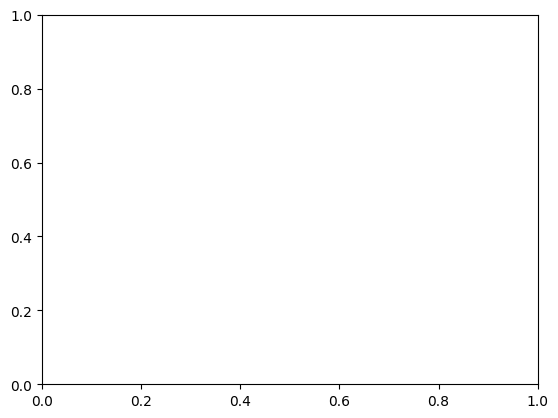

In [29]:
df_duplicates = df[df.duplicated()]
df_duplicates_count = df_duplicates.value_counts()

plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.show()

In [ ]:
df1.shape

(0, 14)

In [ ]:
d

In [ ]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(670, 14)

## Data Normalization

To bring data at one scale

In [ ]:
#pip install scikit-learn
#1. Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#2.  data
df

#3.  Select columns to normalize
columns_to_normalize = ['age', 'fare']

#4. create the scaler function/Tool
scaler = MinMaxScaler()

#5. Fit and transform the data or vice versa
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

#6. check the normalized data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.271174,1,0,0.111538,S,Third,man,True,Southampton,no,False
2,1,3,female,0.321438,0,0,0.121923,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.434531,1,0,0.816923,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.434531,0,0,0.123846,S,Third,man,True,Southampton,no,True
5,0,3,male,0.367921,0,0,0.130128,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.484795,0,5,0.448077,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.233476,0,0,0.461538,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.367921,1,2,0.360769,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.321438,0,0,0.461538,C,First,man,True,Cherbourg,yes,True


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,0.364179,2.437313,0.360602,0.482090,0.388060,0.291663
std,0.481559,0.756504,0.170003,0.938533,0.832006,0.213785
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.258608,0.000000,0.000000,0.121474
50%,0.000000,3.000000,0.367921,0.000000,0.000000,0.200000
75%,1.000000,3.000000,0.434531,1.000000,0.000000,0.404407
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


x_stand = (x - mean(x)) / std(x)

where:

x_stand for standardized variable
x is the original variable
mean(x) is the sum of the variable x
std(x) is the standard deviation of variable x

## Log Transformation

In [ ]:
kashti = sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
import numpy as np

kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())
       
# Log Transformation
kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare'])

c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='sex', ylabel='fare'>

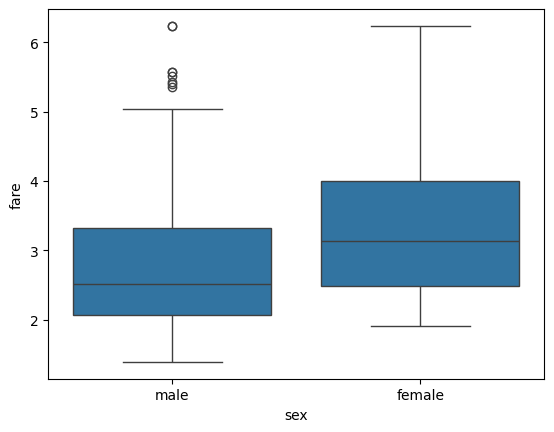

In [ ]:
sns.boxplot(data=kashti, x= 'sex', y='fare')

<Axes: xlabel='age', ylabel='Count'>

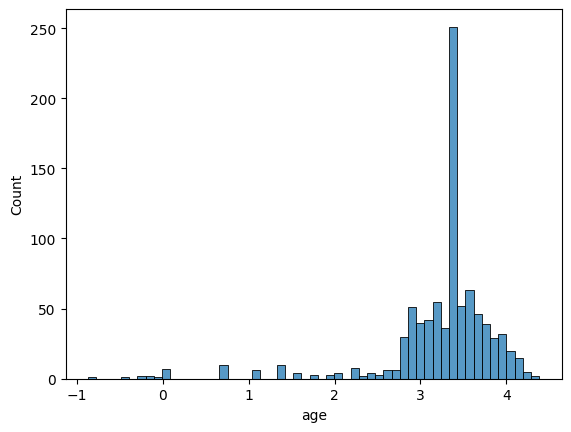

In [ ]:
sns.histplot(kashti['age'])

<Axes: xlabel='age', ylabel='Count'>

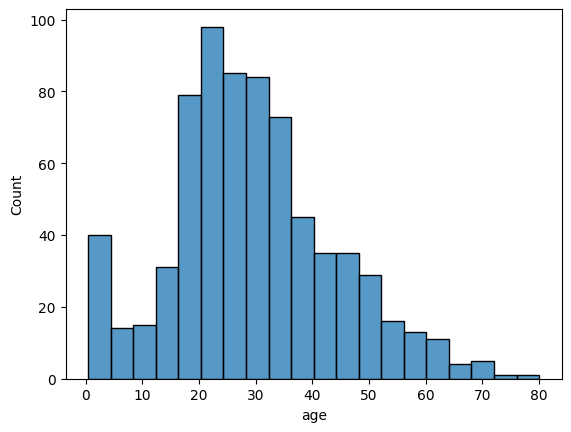

In [91]:
sns.histplot(kashti['age'])

In [32]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

## Oraganing the data

In [31]:
df['family_size'] = df['sibsp'] + df['parch']

c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='family_size'>

c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python314\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


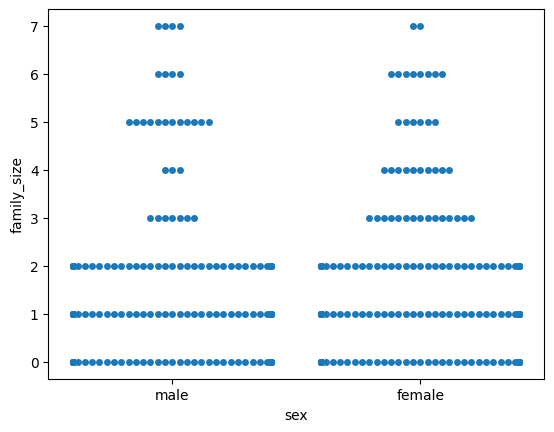

In [33]:
sns.swarmplot(data=df, y='family_size', x='sex')

AttributeError: PathCollection.set() got an unexpected keyword argument 'heu'

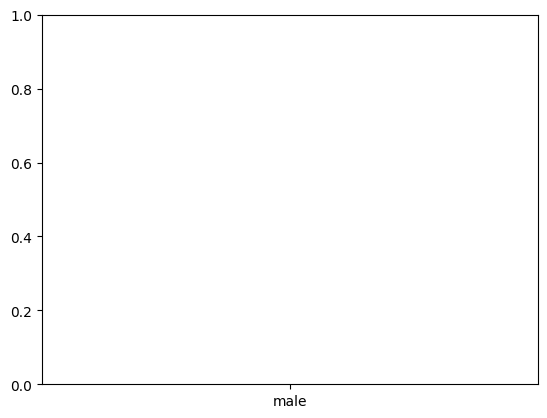

In [36]:
sns.swarmplot(data=df, x= 'sex', y='age', heu ='family_size')

In [37]:
df = df.rename(columns={'survived': 'survival'})

In [39]:
# lets create pivot table
table = pd.pivot_table(df, values='fare', index='pclass', columns='survival', aggfunc=np.sum)
table

C:\Users\USER\AppData\Local\Temp\ipykernel_12152\886251759.py:2: FutureWarning: The provided callable <function sum at 0x0000024BF737D850> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(df, values='fare', index='pclass', columns='survival', aggfunc=np.sum)


survival,0,1
pclass,,
1,1843.9957,2305.9378
2,1515.4958,1918.8459
3,4598.1535,1629.6916


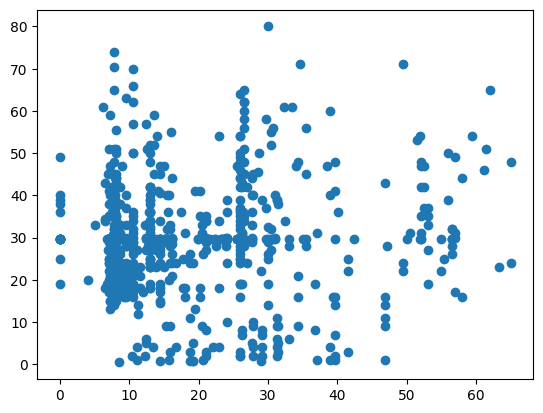

In [40]:
# scatter plot
plt.scatter(data=df, x='fare', y='age')

In [41]:
# lets check the data
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,0


## Saving the wrangled data

In [12]:
# lets save the cleaned data
df.to_csv('preprocessed_data.csv', index=False)
